In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
graph = nx.karate_club_graph()
pos = nx.spring_layout(graph, seed=42) 

Kernighan–Lin Algorithm Overview
- Goal: Partition the graph into two disjoint sets (A and B) with roughly equal sizes.
- Strategy: Iteratively swap pairs of nodes (one from each set) to reduce the number of crossing edges.
- Limitation: Only supports bipartitioning (2-way split), not multi-way community detection.

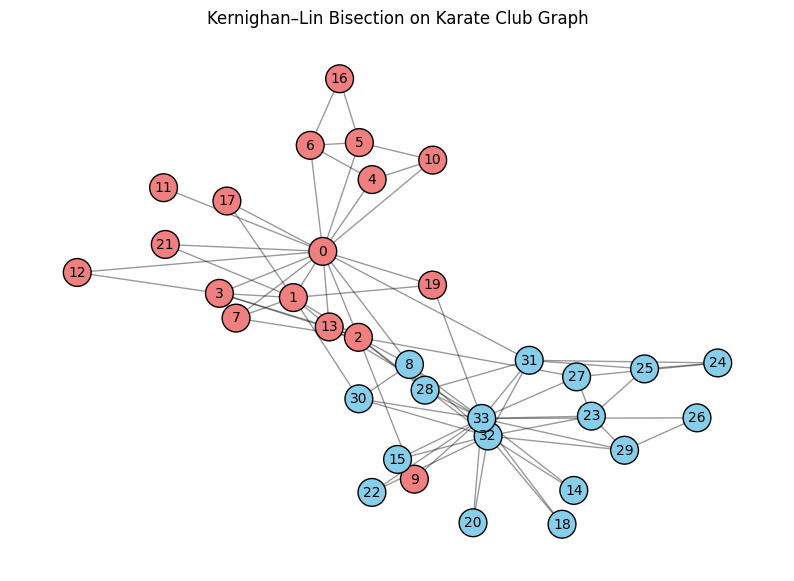

In [21]:
community = nx.community.kernighan_lin_bisection(graph)
# Fixed layout for reproducibility
colors = []

# Assign colors based on partition
for node in graph.nodes():
    if node in community[0]:
        colors.append('skyblue')
    else:
        colors.append('lightcoral')

# Step 4: Draw the graph
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Kernighan–Lin Bisection on Karate Club Graph")
plt.axis('off')
plt.show()

### Edge Betweenness Partition Theory

Edge betweenness partitioning is a community detection method based on the concept of **edge betweenness centrality**. The edge betweenness of an edge is defined as the number of shortest paths between pairs of nodes that pass through that edge. Edges that connect different communities tend to have high edge betweenness because many shortest paths between nodes in different communities must traverse these "bridge" edges.

**Algorithm Steps:**
1. Calculate edge betweenness for all edges in the graph.
2. Remove the edge(s) with the highest betweenness.
3. Recalculate betweenness for the remaining edges.
4. Repeat steps 2–3 until the desired number of communities is achieved.

**Key Points:**
- **Purpose:** To reveal natural divisions in the network by identifying and removing edges that act as bridges between communities.
- **Result:** The network splits into disconnected components, each representing a community.
- **Advantages:** Does not require prior knowledge of the number or size of communities; effective for networks with clear modular structure.
- **Limitations:** Computationally expensive for large graphs; may produce uneven community sizes if the network is imbalanced.

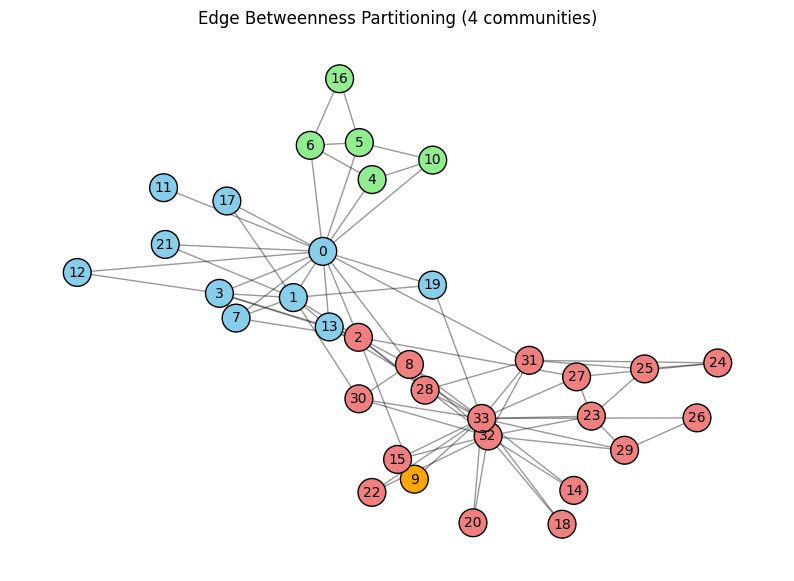

In [22]:
partition = nx.community.edge_betweenness_partition(graph, number_of_sets=4)

# Assign a color to each partition
partition_colors = ['skyblue', 'lightcoral', 'lightgreen','orange']
node_colors = []

for node in graph.nodes():
    for idx, comm in enumerate(partition):
        if node in comm:
            node_colors.append(partition_colors[idx])
            break

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Edge Betweenness Partitioning (4 communities)")
plt.axis('off')
plt.show()


### Edge Current Flow Betweenness Partition

- **Purpose:** Divides a graph into multiple communities by minimizing the number of edges between groups, using current flow betweenness as the splitting criterion.
- **Method:** 
    - Calculates edge betweenness based on electrical current flow (using Kirchhoff's laws).
    - Iteratively removes edges with the highest current flow betweenness, which are most "central" to connecting different parts of the graph.
    - The process continues until the desired number of partitions is reached.
- **Advantages:** 
    - Captures global connectivity and can reveal natural community structure.
    - Useful for identifying bottlenecks and bridges in networks.
- **Limitations:** 
    - Computationally intensive for large graphs.
    - May produce unevenly sized communities if the graph structure is highly imbalanced.

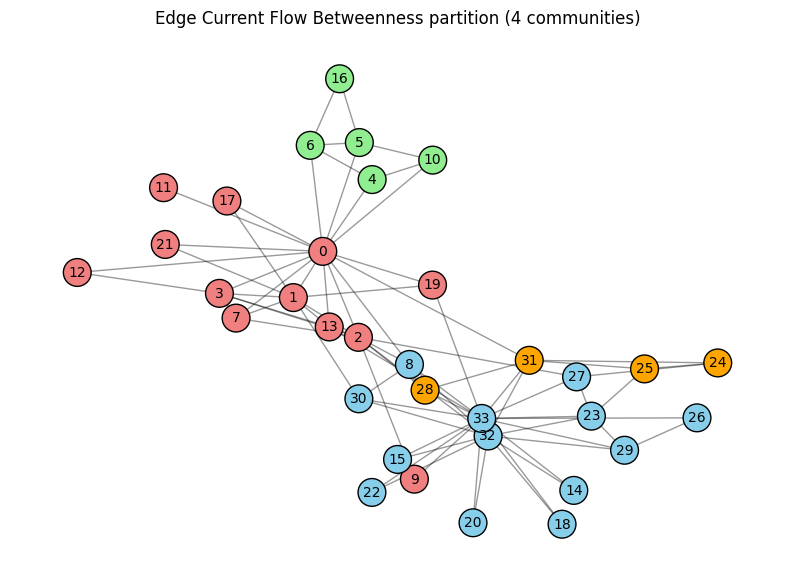

In [25]:
partition = nx.community.edge_current_flow_betweenness_partition(graph, number_of_sets=4)

# Assign a color to each partition
partition_colors = ['skyblue', 'lightcoral', 'lightgreen','orange']
node_colors = []

for node in graph.nodes():
    for idx, comm in enumerate(partition):
        if node in comm:
            node_colors.append(partition_colors[idx])
            break

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Edge Current Flow Betweenness partition (4 communities)")
plt.axis('off')
plt.show()


### K-Clique Partitioning Overview

**K-Clique partitioning** is a community detection method that identifies groups of nodes in a graph that are highly interconnected, forming cliques of size *k* or larger.

- **Definition:** A *k*-clique is a complete subgraph of *k* nodes, where every node is connected to every other node in the clique.
- **Algorithm Steps:**
    1. Find all cliques of size *k* or greater in the graph.
    2. Build a clique graph where each node represents a clique, and edges connect cliques that share *k-1* nodes.
    3. Communities are defined as the connected components in the clique graph.
- **Purpose:** Reveals tightly-knit groups in networks, useful for social network analysis and biological networks.
- **Advantages:** Detects overlapping communities, as nodes can belong to multiple cliques.
- **Limitations:** Computationally expensive for large graphs or large *k*; may miss loosely connected communities. 

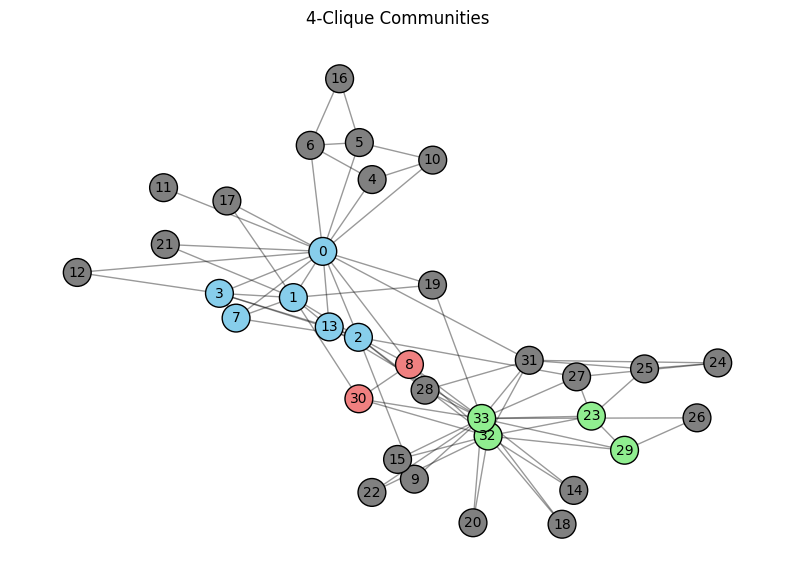

In [39]:
# Find k-clique communities in the graph using NetworkX
k = 4  # You can change k to any integer >= 2
clique_communities = list(nx.community.k_clique_communities(graph, k))

# Assign a color to each k-clique community
clique_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_clique_colors = ['gray'] * graph.number_of_nodes()
# nodes that donot belong to alteast one k-clique community will be colored gray

for idx, comm in enumerate(clique_communities):
    for node in comm:
        node_clique_colors[node] = clique_colors[idx % len(clique_colors)]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_clique_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title(f"{k}-Clique Communities")
plt.axis('off')
plt.show()

### Greedy Modularity Community Detection
**Greedy modularity community detection** is an algorithm that partitions a graph into communities by maximizing the modularity score. Modularity measures the strength of division of a network into modules (communities), with higher values indicating denser connections within communities and sparser connections between them.

**Algorithm Steps:**
1. Start with each node in its own community.
2. Iteratively join pairs of communities that result in the greatest increase (or smallest decrease) in modularity.
3. Continue until no further improvement is possible.

**Key Points:**
- **Purpose:** To find a partitioning of the graph that reveals community structure by maximizing modularity.
- **Result:** Communities with dense internal connections and sparse external connections.
- **Advantages:** Fast and scalable for large networks; does not require specifying the number of communities.
- **Limitations:** May not detect small or overlapping communities; modularity optimization can suffer from resolution limits.

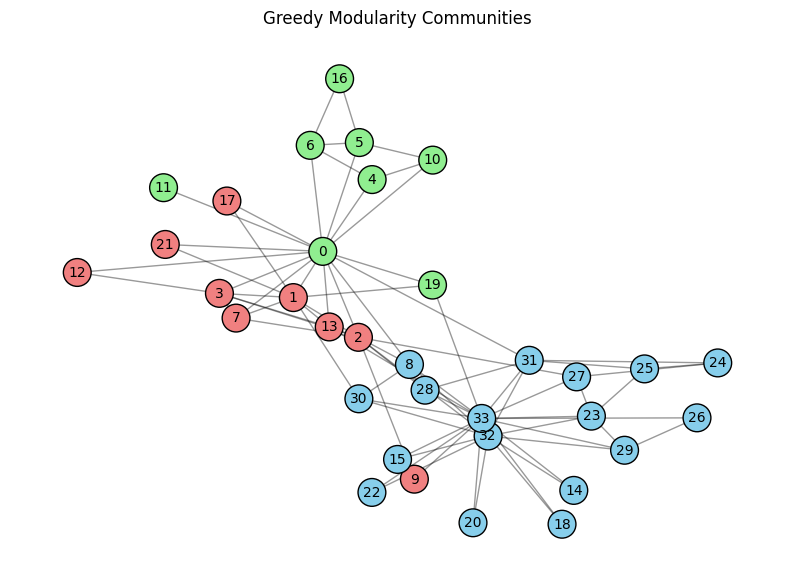

In [44]:
community = nx.community.greedy_modularity_communities(graph)
# Assign a color to each community
community_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_colors = []
for node in graph.nodes():
    for idx, comm in enumerate(community):
        if node in comm:
            node_colors.append(community_colors[idx % len(community_colors)])
            break
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Greedy Modularity Communities")
plt.axis('off')
plt.show()



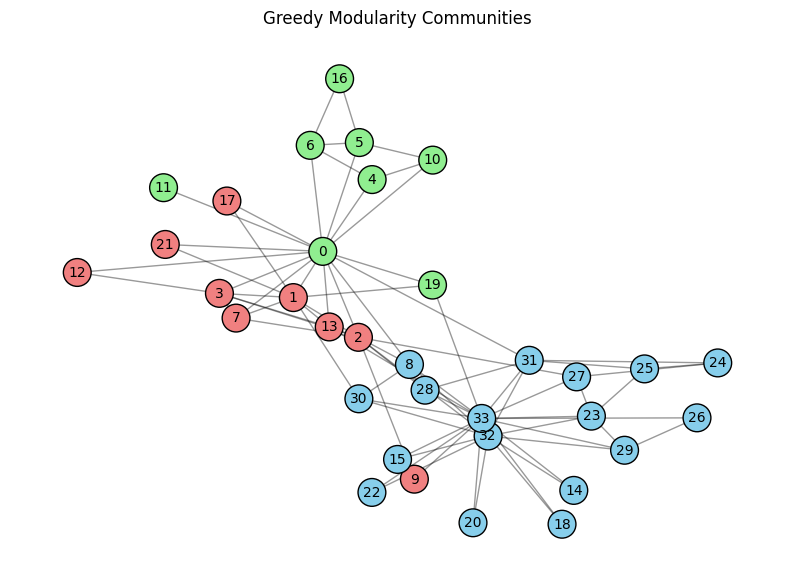

In [ ]:
community = nx.community.naive_greedy_modularity_communities(graph)
# Assign a color to each community
community_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_colors = []
for node in graph.nodes():
    for idx, comm in enumerate(community):
        if node in comm:
            node_colors.append(community_colors[idx % len(community_colors)])
            break
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Naive Greedy Modularity Communities")
plt.axis('off')
plt.show()

### Label Propagation Community Detection Algorithms

1. **Label Propagation (LPA)**
    - **Function:** `label_propagation_communities(graph)`
    - **Description:** Assigns each node a unique label, then iteratively updates each node's label to the most frequent label among its neighbors. Communities emerge as groups of nodes sharing the same label.
    - **Advantages:** Fast, scalable, and parameter-free.
    - **Limitations:** Results can vary between runs due to randomness; may produce uneven community sizes.

2. **Asynchronous Label Propagation (Async LPA)**
    - **Function:** `asyn_lpa_communities(graph)`
    - **Description:** Similar to LPA, but updates node labels asynchronously (one node at a time in random order), which can improve convergence and stability.
    - **Advantages:** Often faster and more stable than synchronous LPA.
    - **Limitations:** Still non-deterministic; results may vary between runs.

3. **Fast Label Propagation (LPA Communities)**
    - **Function:** `fast_label_propagations_communities(graph)`
    - **Description:** An optimized version of label propagation for faster execution, especially on large graphs. The implementation may differ slightly in update rules or stopping criteria.
    - **Advantages:** Very fast, suitable for large-scale networks.
    - **Limitations:** Like other label propagation methods, results can be unstable and vary between runs.

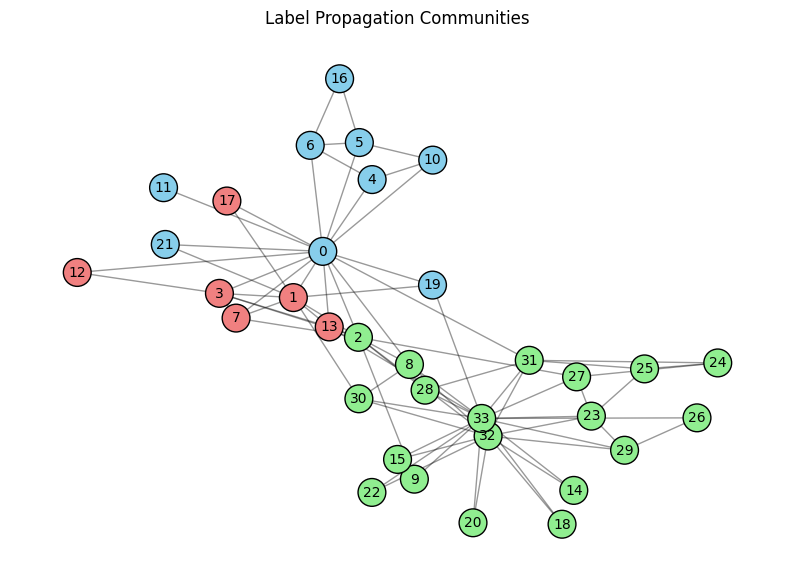

In [ ]:
# Label Propagation Community Detection Demo
lpa_communities = list(nx.community.asyn_lpa_communities(graph))

# Assign a color to each community
lpa_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_lpa_colors = ['gray'] * graph.number_of_nodes()

for idx, comm in enumerate(lpa_communities):
    for node in comm:
        node_lpa_colors[node] = lpa_colors[idx % len(lpa_colors)]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_lpa_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Label Propagation Communities")
plt.axis('off')
plt.show()

#different outoputs for each run cause of randomness in label propagation

### Greedy Source Expansion (Local Community Detection)

- **Purpose:** Finds a local community around a given source node by greedily expanding the community to maximize a quality function (often modularity or conductance).
- **Method:**
    1. **Start** with a source node as the initial community.
    2. **Iteratively add** neighboring nodes that most improve the community quality (e.g., increase modularity or decrease conductance).
    3. **Stop** when no addition improves the quality or a stopping criterion is met.
- **Advantages:**
    - Efficient for finding communities around specific nodes.
    - Useful for large graphs where global community detection is expensive.
    - Can reveal overlapping or fuzzy community boundaries.
- **Limitations:**
    - Results depend on the choice of source node.
    - May miss global structure or communities not centered on the source.
    - Sensitive to the quality function used for expansion.

**Typical Use Case:** Social networks, biological networks, or any scenario where the local neighborhood of a node is of interest.


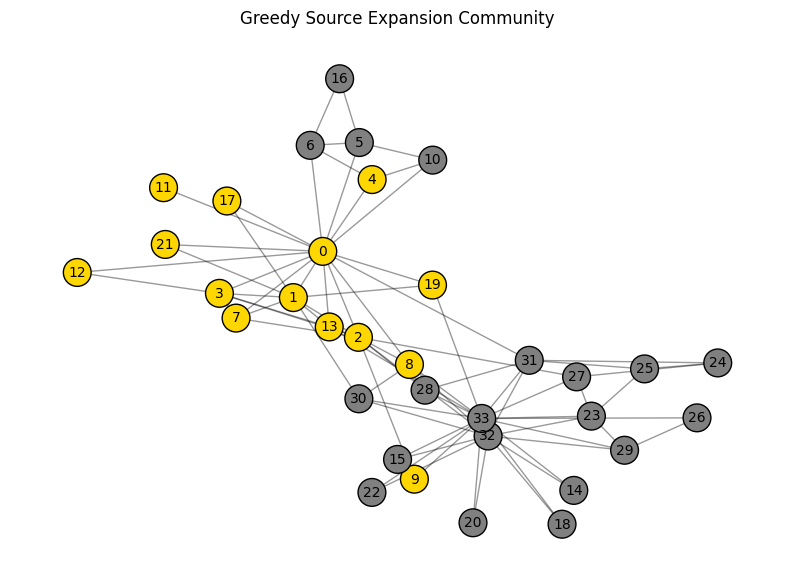

In [59]:
community = nx.community.greedy_source_expansion(graph, source=0)
# Assign colors: nodes in the community are colored, others are gray
node_colors = []
for node in graph.nodes():
    if node in community:
        node_colors.append('gold')
    else:
        node_colors.append('gray')

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Greedy Source Expansion Community")
plt.axis('off')
plt.show()


### Louvain Community Detection

The **Louvain algorithm** is a popular method for detecting communities in large networks by optimizing modularity. It works in two phases:
1. **Local Modularity Optimization:** Each node is assigned to its own community, then nodes are moved between communities to maximize modularity gain.
2. **Community Aggregation:** Communities are treated as single nodes and the process repeats, building a hierarchy of communities.

**Advantages:** Fast, scalable, and produces high-modularity partitions.
**Limitations:** Results can vary due to randomness; may not detect small or overlapping communities.


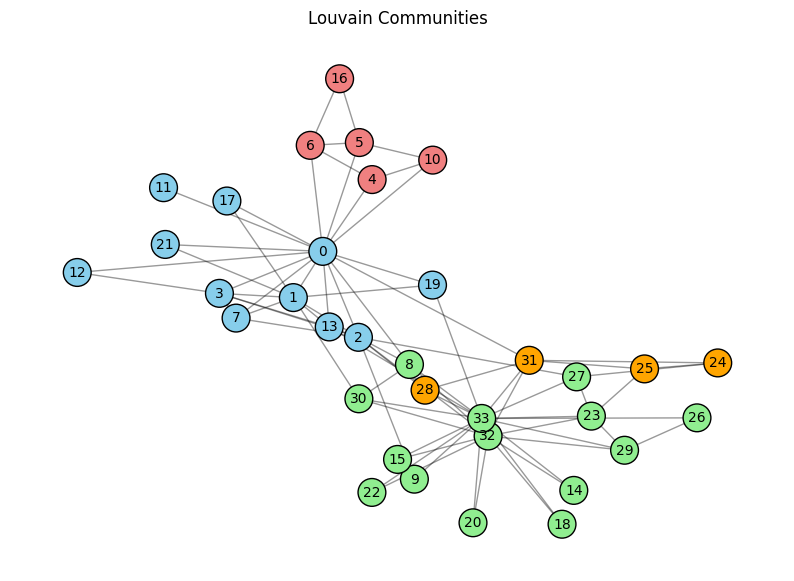

In [62]:
# Compute Louvain partition
louvain_partition = nx.community.louvain_communities(graph)

# Assign a color to each community
louvain_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_louvain_colors = ['gray'] * graph.number_of_nodes()
for idx, comm in enumerate(louvain_partition):
	for node in comm:
		node_louvain_colors[node] = louvain_colors[idx % len(louvain_colors)]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_louvain_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Louvain Communities")
plt.axis('off')
plt.show()

### Asynchronous Fluid Communities (FluidC)

**Async FluidC** is a fast, scalable community detection algorithm that partitions a graph into a specified number of communities (*k*) by simulating the flow of "fluid" between nodes. Each community is represented by a fluid that spreads through the network, competing for nodes. The process is asynchronous, meaning nodes are updated one at a time in random order, which helps avoid oscillations and improves convergence.

**Key Points:**
- **Parameter:** Number of communities (*k*) must be specified.
- **Advantages:** Efficient for large graphs, produces non-overlapping communities, and is robust to network structure.
- **Limitations:** Requires *k* as input; results may vary due to randomness in node updates.

**Typical Use Case:** Social networks, biological networks, or any scenario where fast, scalable community detection is needed.

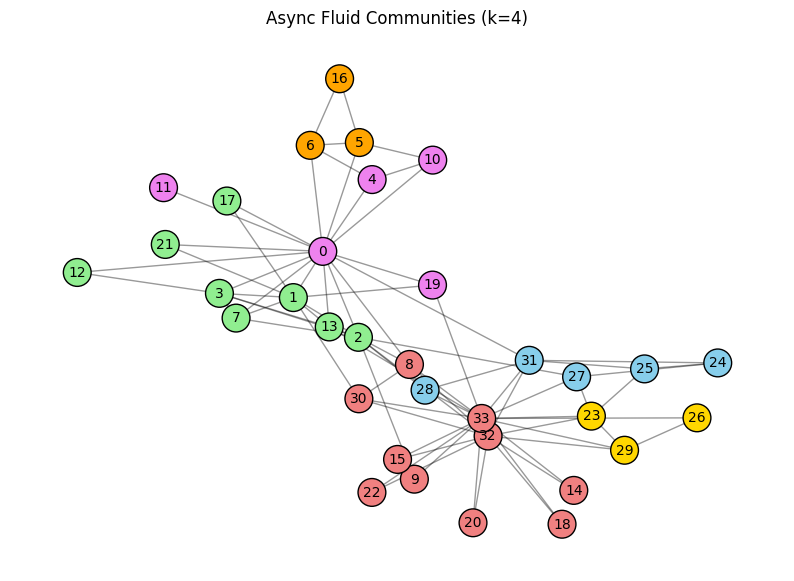

In [65]:
# Async Fluid Community Detection (Label Propagation)
fluid_communities = list(nx.community.asyn_fluidc(graph, k=6))

# Assign a color to each fluid community
fluid_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_fluid_colors = ['gray'] * graph.number_of_nodes()

for idx, comm in enumerate(fluid_communities):
    for node in comm:
        node_fluid_colors[node] = fluid_colors[idx % len(fluid_colors)]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_fluid_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Async Fluid Communities (k=4)")
plt.axis('off')
plt.show()

### Girvan–Newman Algorithm Overview

The **Girvan–Newman algorithm** is a classic method for detecting communities in complex networks. It works by iteratively removing edges with the highest edge betweenness centrality, which are likely to connect different communities.

**Key Concepts:**
- **Edge Betweenness Centrality:** Measures the number of shortest paths that pass through an edge. Edges connecting communities tend to have high betweenness.
- **Process:** 
    1. Calculate edge betweenness for all edges.
    2. Remove the edge(s) with the highest betweenness.
    3. Recalculate betweenness for the remaining edges.
    4. Repeat until the network splits into distinct communities.

**Advantages:**
- Reveals natural divisions in networks.
- Does not require specifying the number of communities in advance.

**Limitations:**
- Computationally expensive for large graphs.
- May produce uneven community sizes if the network is imbalanced.

**Typical Use Case:** Social networks, biological networks, and any scenario where uncovering modular structure is important.

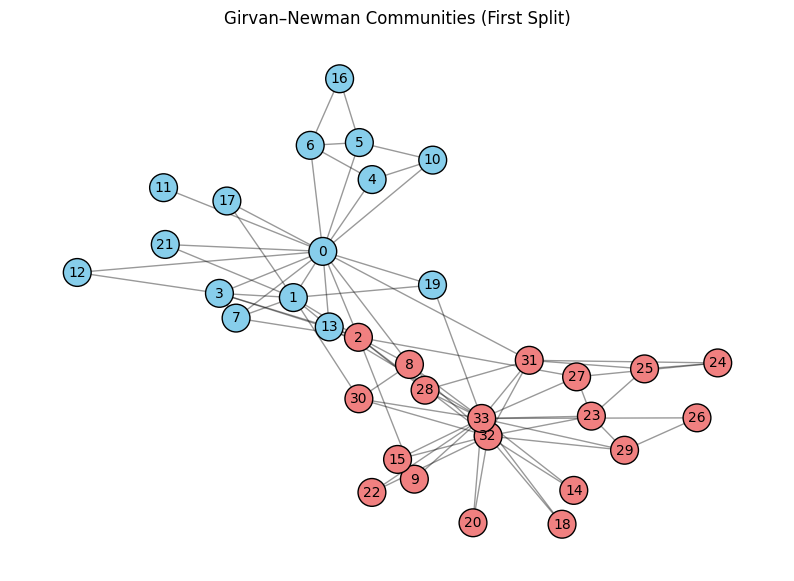

In [69]:
from networkx.algorithms.community import girvan_newman

# Run Girvan–Newman algorithm on the graph
gn_communities = next(girvan_newman(graph))

# Assign a color to each community
gn_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'violet', 'gold', 'lime', 'pink']
node_gn_colors = ['gray'] * graph.number_of_nodes()

for idx, comm in enumerate(gn_communities):
    for node in comm:
        node_gn_colors[node] = gn_colors[idx % len(gn_colors)]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(graph, pos, node_color=node_gn_colors, node_size=400, edgecolors='black')
nx.draw_networkx_edges(graph, pos, alpha=0.4)
nx.draw_networkx_labels(graph, pos, font_size=10)
plt.title("Girvan–Newman Communities (First Split)")
plt.axis('off')
plt.show()